In [997]:
import warnings
warnings.filterwarnings("ignore")

**Importing Data**

In [998]:
import pandas as pd

train = pd.read_csv('/content/drive/MyDrive/price_train.csv')

In [999]:
train

,X1,id,host_is_superhost,host_response_rate,host_response_time,host_listings_count,host_identity_verified,accommodates,neighbourhood_group_cleansed,property_type,room_type,latitude,longitude,guests_included,bathrooms,bedrooms,beds,bed_type,amenities,cleaning_fee,minimum_nights,maximum_nights,instant_bookable,cancellation_policy,price
0,5460,22146017,False,99%,within an hour,521,False,5,Downtown,Apartment,Entire home/apt,47.612163,-122.338239,4,2.0,2,2,Real Bed,"{TV,Internet,Wifi,Kitchen,Elevator,Heating,""Fa...",$129.00,2,1125,True,strict,$279.00
1,4143,18638163,True,100%,within an hour,1,True,2,Queen Anne,House,Entire home/apt,47.640827,-122.355248,1,1.0,0,1,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$50.00,2,30,True,moderate,$99.00
2,5802,22734110,True,100%,within an hour,1,False,4,Rainier Valley,Guest suite,Entire home/apt,47.549007,-122.273951,2,1.0,1,2,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Free stre...",$25.00,2,28,False,moderate,$75.00
3,776,3946674,True,90%,within a few hours,1,True,2,Central Area,House,Private room,47.601922,-122.307979,1,1.0,1,1,Real Bed,"{Internet,Wifi,Kitchen,""Pets live on this prop...",$0.00,2,30,False,flexible,$70.00
4,6064,23610186,True,100%,within an hour,4,True,8,Beacon Hill,House,Entire home/apt,47.552311,-122.293409,6,2.5,3,3,Real Bed,"{TV,Wifi,Kitchen,""Free parking on premises"",""S...",$99.00,2,12,False,flexible,$242.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3461,5550,22208755,False,99%,within an hour,521,False,5,Downtown,Apartment,Entire home/apt,47.610532,-122.342332,4,1.0,2,2,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,G...",$129.00,2,1125,True,strict,$350.00
3462,7391,28049926,False,100%,within an hour,123,False,1,Capitol Hill,House,Shared room,47.642069,-122.304120,1,1.0,1,1,Real Bed,"{Wifi,Kitchen,Heating,Essentials,Shampoo,Hange...",$15.00,1,21,True,strict_14_with_grace_period,$30.00
3463,6056,23567364,True,100%,within an hour,4,False,2,Other neighborhoods,House,Private room,47.716853,-122.353945,1,2.0,1,1,Real Bed,"{Wifi,Kitchen,""Free parking on premises"",""Pets...",$22.00,2,30,True,flexible,$30.00
3464,1277,6728419,True,100%,within a few hours,1,False,2,Other neighborhoods,Guest suite,Entire home/apt,47.672343,-122.283291,1,1.0,1,1,Real Bed,"{TV,Wifi,""Free parking on premises"",""Indoor fi...",$25.00,1,1125,False,flexible,$95.00


# Exploratory Data Analysis:

In [1000]:
train.columns

Index(['X1', 'id', 'host_is_superhost', 'host_response_rate',
       'host_response_time', 'host_listings_count', 'host_identity_verified',
       'accommodates', 'neighbourhood_group_cleansed', 'property_type',
       'room_type', 'latitude', 'longitude', 'guests_included', 'bathrooms',
       'bedrooms', 'beds', 'bed_type', 'amenities', 'cleaning_fee',
       'minimum_nights', 'maximum_nights', 'instant_bookable',
       'cancellation_policy', 'price'],
      dtype='object')

In [1001]:
#Checking for NUll Values
print('Total Number of NAN values in DataFrame: ',train.isnull().sum().sum())

Total Number of NAN values in DataFrame:  0


In [1002]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3466 entries, 0 to 3465
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   X1                            3466 non-null   int64  
 1   id                            3466 non-null   int64  
 2   host_is_superhost             3466 non-null   bool   
 3   host_response_rate            3466 non-null   object 
 4   host_response_time            3466 non-null   object 
 5   host_listings_count           3466 non-null   int64  
 6   host_identity_verified        3466 non-null   bool   
 7   accommodates                  3466 non-null   int64  
 8   neighbourhood_group_cleansed  3466 non-null   object 
 9   property_type                 3466 non-null   object 
 10  room_type                     3466 non-null   object 
 11  latitude                      3466 non-null   float64
 12  longitude                     3466 non-null   float64
 13  gue

In [1003]:
print('Percentage of X1 Feature being unique for each row: ',(len(train['X1'].value_counts())/len(train)*100))
print('Percentage of id Feature being unique for each row: ',(len(train['id'].value_counts())/len(train)*100))



Percentage of X1 Feature being unique for each row:  100.0
Percentage of id Feature being unique for each row:  100.0


Since both the rows have totally unique values in all the rows we can neglect these values when it comes to model training

In [1004]:
#Dropping X1 and id column
train.drop( columns= ['X1', 'id'], inplace = True)
train.head(5)

,host_is_superhost,host_response_rate,host_response_time,host_listings_count,host_identity_verified,accommodates,neighbourhood_group_cleansed,property_type,room_type,latitude,longitude,guests_included,bathrooms,bedrooms,beds,bed_type,amenities,cleaning_fee,minimum_nights,maximum_nights,instant_bookable,cancellation_policy,price
0,False,99%,within an hour,521,False,5,Downtown,Apartment,Entire home/apt,47.612163,-122.338239,4,2.0,2,2,Real Bed,"{TV,Internet,Wifi,Kitchen,Elevator,Heating,""Fa...",$129.00,2,1125,True,strict,$279.00
1,True,100%,within an hour,1,True,2,Queen Anne,House,Entire home/apt,47.640827,-122.355248,1,1.0,0,1,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$50.00,2,30,True,moderate,$99.00
2,True,100%,within an hour,1,False,4,Rainier Valley,Guest suite,Entire home/apt,47.549007,-122.273951,2,1.0,1,2,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Free stre...",$25.00,2,28,False,moderate,$75.00
3,True,90%,within a few hours,1,True,2,Central Area,House,Private room,47.601922,-122.307979,1,1.0,1,1,Real Bed,"{Internet,Wifi,Kitchen,""Pets live on this prop...",$0.00,2,30,False,flexible,$70.00
4,True,100%,within an hour,4,True,8,Beacon Hill,House,Entire home/apt,47.552311,-122.293409,6,2.5,3,3,Real Bed,"{TV,Wifi,Kitchen,""Free parking on premises"",""S...",$99.00,2,12,False,flexible,$242.00


In [1005]:
#Using Label Encoder for the Features which Represent Boolean Chracter:
from sklearn.preprocessing import LabelEncoder 
  
le_superhost = LabelEncoder() 
le_identity = LabelEncoder()
le_instant = LabelEncoder()

  
train['host_is_superhost']= le_superhost.fit_transform(train['host_is_superhost'])
train['host_identity_verified']= le_identity.fit_transform(train['host_identity_verified'])
train['instant_bookable']= le_instant.fit_transform(train['instant_bookable'])
train.head(5)

,host_is_superhost,host_response_rate,host_response_time,host_listings_count,host_identity_verified,accommodates,neighbourhood_group_cleansed,property_type,room_type,latitude,longitude,guests_included,bathrooms,bedrooms,beds,bed_type,amenities,cleaning_fee,minimum_nights,maximum_nights,instant_bookable,cancellation_policy,price
0,0,99%,within an hour,521,0,5,Downtown,Apartment,Entire home/apt,47.612163,-122.338239,4,2.0,2,2,Real Bed,"{TV,Internet,Wifi,Kitchen,Elevator,Heating,""Fa...",$129.00,2,1125,1,strict,$279.00
1,1,100%,within an hour,1,1,2,Queen Anne,House,Entire home/apt,47.640827,-122.355248,1,1.0,0,1,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$50.00,2,30,1,moderate,$99.00
2,1,100%,within an hour,1,0,4,Rainier Valley,Guest suite,Entire home/apt,47.549007,-122.273951,2,1.0,1,2,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Free stre...",$25.00,2,28,0,moderate,$75.00
3,1,90%,within a few hours,1,1,2,Central Area,House,Private room,47.601922,-122.307979,1,1.0,1,1,Real Bed,"{Internet,Wifi,Kitchen,""Pets live on this prop...",$0.00,2,30,0,flexible,$70.00
4,1,100%,within an hour,4,1,8,Beacon Hill,House,Entire home/apt,47.552311,-122.293409,6,2.5,3,3,Real Bed,"{TV,Wifi,Kitchen,""Free parking on premises"",""S...",$99.00,2,12,0,flexible,$242.00


In [1006]:
# Removing Characters from Numeric Data 
import re
train['host_response_rate'] = train['host_response_rate'].apply(lambda x: re.sub(r'[%]', '', x))
train['host_response_rate'] = train['host_response_rate'].astype(float)
train['price'] = train['price'].apply(lambda x: x.replace('$', ''))
train['price'] = train['price'].apply(lambda x: x.replace(',', ''))
train['price'] = train['price'].astype(float)
train['cleaning_fee'] = train['cleaning_fee'].apply(lambda x: x.replace('$', ''))
train['cleaning_fee'] = train['cleaning_fee'].apply(lambda x: x.replace(',', ''))
train['cleaning_fee'] = train['cleaning_fee'].astype(float)
train.head(5)

,host_is_superhost,host_response_rate,host_response_time,host_listings_count,host_identity_verified,accommodates,neighbourhood_group_cleansed,property_type,room_type,latitude,longitude,guests_included,bathrooms,bedrooms,beds,bed_type,amenities,cleaning_fee,minimum_nights,maximum_nights,instant_bookable,cancellation_policy,price
0,0,99.0,within an hour,521,0,5,Downtown,Apartment,Entire home/apt,47.612163,-122.338239,4,2.0,2,2,Real Bed,"{TV,Internet,Wifi,Kitchen,Elevator,Heating,""Fa...",129.0,2,1125,1,strict,279.0
1,1,100.0,within an hour,1,1,2,Queen Anne,House,Entire home/apt,47.640827,-122.355248,1,1.0,0,1,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",50.0,2,30,1,moderate,99.0
2,1,100.0,within an hour,1,0,4,Rainier Valley,Guest suite,Entire home/apt,47.549007,-122.273951,2,1.0,1,2,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Free stre...",25.0,2,28,0,moderate,75.0
3,1,90.0,within a few hours,1,1,2,Central Area,House,Private room,47.601922,-122.307979,1,1.0,1,1,Real Bed,"{Internet,Wifi,Kitchen,""Pets live on this prop...",0.0,2,30,0,flexible,70.0
4,1,100.0,within an hour,4,1,8,Beacon Hill,House,Entire home/apt,47.552311,-122.293409,6,2.5,3,3,Real Bed,"{TV,Wifi,Kitchen,""Free parking on premises"",""S...",99.0,2,12,0,flexible,242.0


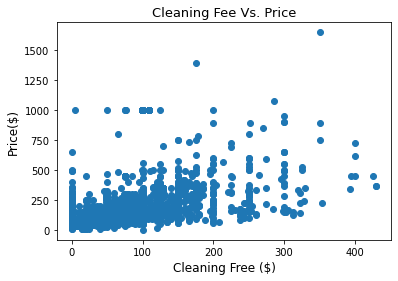

In [1007]:
import matplotlib.pyplot as plt

plt.scatter(train['cleaning_fee'], train['price'])
plt.xlabel('Cleaning Free ($)', size = 12)
plt.ylabel('Price($)', size = 12)
plt.title('Cleaning Fee Vs. Price', size = 13)
plt.show()

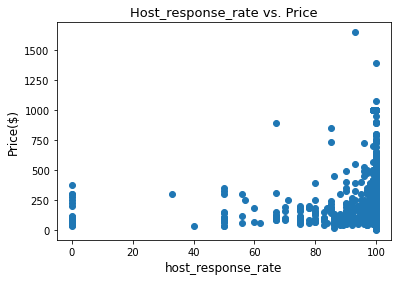

In [1008]:
import matplotlib.pyplot as plt

plt.scatter(train['host_response_rate'], train['price'])
plt.xlabel('host_response_rate', size = 12)
plt.ylabel('Price($)', size = 12)
plt.title('Host_response_rate vs. Price', size = 13)
plt.show()

Most of the Data points belong to higher host response rate and all of them most overlapped price ponits

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5356e98d30>,
      dtype=object)

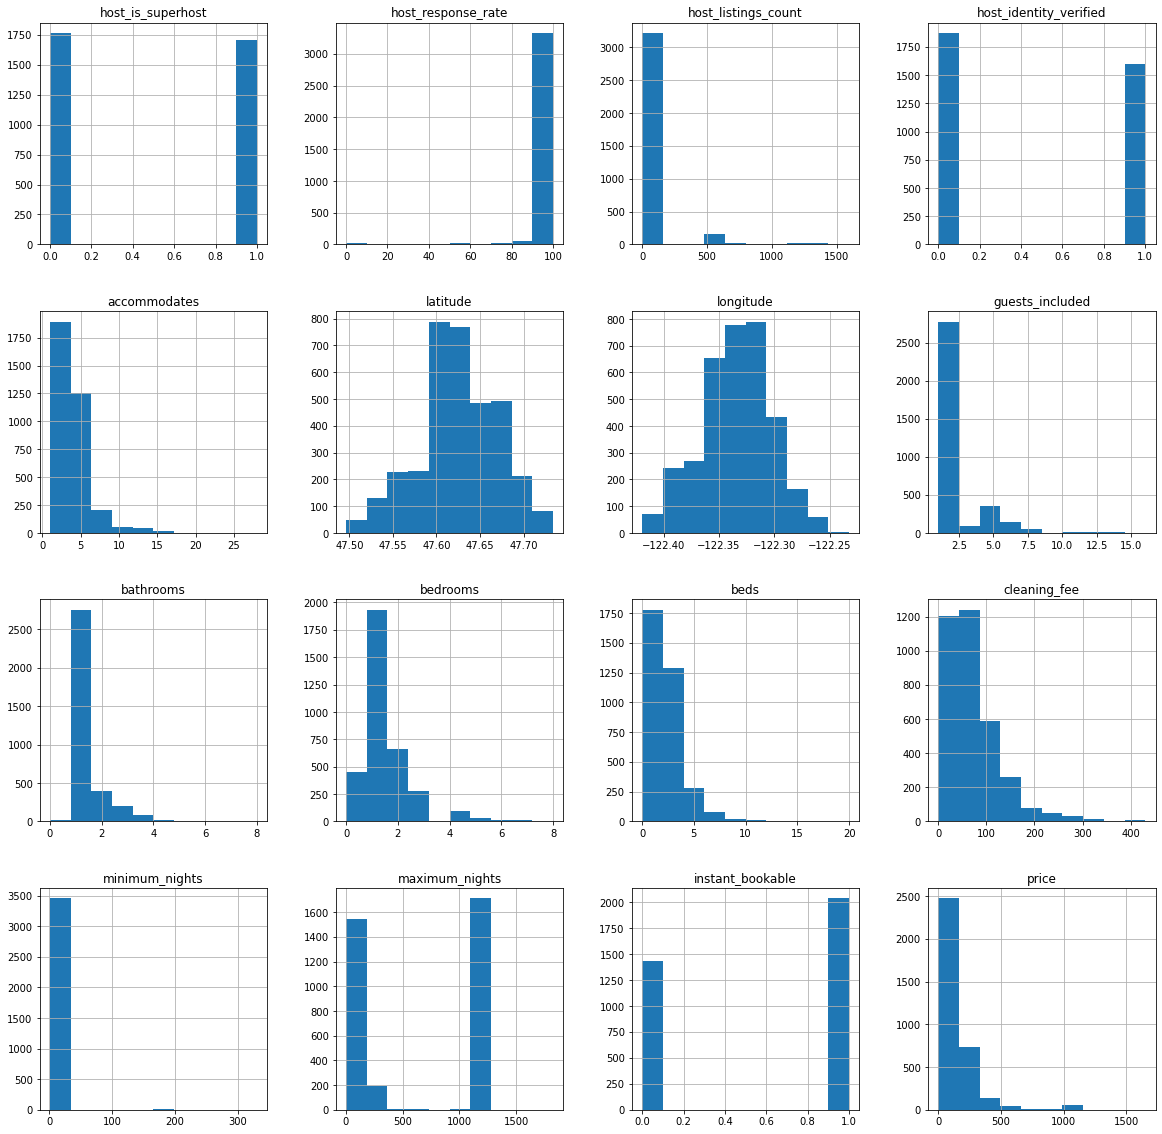

In [1009]:
train.hist(figsize=(20,20))

The above plot doesn't show any Feature containing single category

# Data Engineering:

Now will be try to clean each and every individual Column as much as possible:

**Room Type:**

In [1010]:
train['room_type'].value_counts(normalize=True)

Entire home/apt    0.763993
Private room       0.213503
Shared room        0.022504
Name: room_type, dtype: float64

In [1011]:
#Creating Dummies using pd.get_dummies:

response_time_one_hot = pd.get_dummies(train['host_response_time'])
train = train.drop('host_response_time', axis= 1)
train = train.join(response_time_one_hot)
train.head(5)

,host_is_superhost,host_response_rate,host_listings_count,host_identity_verified,accommodates,neighbourhood_group_cleansed,property_type,room_type,latitude,longitude,guests_included,bathrooms,bedrooms,beds,bed_type,amenities,cleaning_fee,minimum_nights,maximum_nights,instant_bookable,cancellation_policy,price,a few days or more,within a day,within a few hours,within an hour
0,0,99.0,521,0,5,Downtown,Apartment,Entire home/apt,47.612163,-122.338239,4,2.0,2,2,Real Bed,"{TV,Internet,Wifi,Kitchen,Elevator,Heating,""Fa...",129.0,2,1125,1,strict,279.0,0,0,0,1
1,1,100.0,1,1,2,Queen Anne,House,Entire home/apt,47.640827,-122.355248,1,1.0,0,1,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",50.0,2,30,1,moderate,99.0,0,0,0,1
2,1,100.0,1,0,4,Rainier Valley,Guest suite,Entire home/apt,47.549007,-122.273951,2,1.0,1,2,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Free stre...",25.0,2,28,0,moderate,75.0,0,0,0,1
3,1,90.0,1,1,2,Central Area,House,Private room,47.601922,-122.307979,1,1.0,1,1,Real Bed,"{Internet,Wifi,Kitchen,""Pets live on this prop...",0.0,2,30,0,flexible,70.0,0,0,1,0
4,1,100.0,4,1,8,Beacon Hill,House,Entire home/apt,47.552311,-122.293409,6,2.5,3,3,Real Bed,"{TV,Wifi,Kitchen,""Free parking on premises"",""S...",99.0,2,12,0,flexible,242.0,0,0,0,1


**Amenities:**

In [1012]:
train['amenities'][1]

'{TV,"Cable TV",Internet,Wifi,"Air conditioning",Kitchen,"Pets live on this property","Free street parking","Indoor fireplace",Heating,Washer,Dryer,"Smoke detector","Carbon monoxide detector","First aid kit","Safety card",Essentials,Shampoo,Hangers,"Hair dryer",Iron,"Laptop friendly workspace","translation missing: en.hosting_amenity_49","translation missing: en.hosting_amenity_50","Self check-in",Keypad,"Private entrance","Hot water","Bed linens",Microwave,"Coffee maker",Refrigerator,Dishwasher,"Dishes and silverware","Cooking basics",Oven,Stove,"Luggage dropoff allowed","Full kitchen"}'

We can observe that this column requires a lot of text_preprocessing to clealry understand the list of amenities

In [1013]:
def text_preprocessing(dataframe, column_name):
  import re
  #Regex Preprocessing
  dataframe[column_name] = dataframe[column_name].apply(lambda x : x.replace('}' , ','))
  dataframe[column_name] = dataframe[column_name].apply(lambda x : x.replace('{', ''))
  dataframe[column_name] = dataframe[column_name].apply(lambda x : x.replace('"', ''))
  dataframe[column_name] = dataframe[column_name].apply(lambda x : ' '.join([w.strip() for w in x.split(',')]))
  return dataframe

In [1014]:
train = text_preprocessing(train, 'amenities')

In [1015]:
train['amenities'][1]

'TV Cable TV Internet Wifi Air conditioning Kitchen Pets live on this property Free street parking Indoor fireplace Heating Washer Dryer Smoke detector Carbon monoxide detector First aid kit Safety card Essentials Shampoo Hangers Hair dryer Iron Laptop friendly workspace translation missing: en.hosting_amenity_49 translation missing: en.hosting_amenity_50 Self check-in Keypad Private entrance Hot water Bed linens Microwave Coffee maker Refrigerator Dishwasher Dishes and silverware Cooking basics Oven Stove Luggage dropoff allowed Full kitchen '

In [1016]:
amenities_list = list(amenities_set)
amenities_dict = {}
for i in range(len(amenities_list)):
  print('Number of Datapoints having '+str(amenities_list[i])+' Amenity: ',end = ' ')
  print(len(train[train['amenities'].str.contains(amenities_list[i])]))
  amenities_dict[amenities_list[i]] = len(train[train['amenities'].str.contains(amenities_list[i])])

Number of Datapoints having Private hot tub Amenity:  3
Number of Datapoints having  Amenity:  3466
Number of Datapoints having Flat path to front door Amenity:  193
Number of Datapoints having Air conditioning Amenity:  868
Number of Datapoints having DVD player Amenity:  12
Number of Datapoints having Waterfront Amenity:  40
Number of Datapoints having Hammock Amenity:  3
Number of Datapoints having Smoke detector Amenity:  3296
Number of Datapoints having Body soap Amenity:  115
Number of Datapoints having Free street parking Amenity:  1577
Number of Datapoints having Doorman Amenity:  25
Number of Datapoints having Handheld shower head Amenity:  119
Number of Datapoints having Soaking tub Amenity:  11
Number of Datapoints having Jetted tub Amenity:  3
Number of Datapoints having Convection oven Amenity:  8
Number of Datapoints having Disabled parking spot Amenity:  40
Number of Datapoints having Outlet covers Amenity:  86
Number of Datapoints having Essentials Amenity:  3416
Number

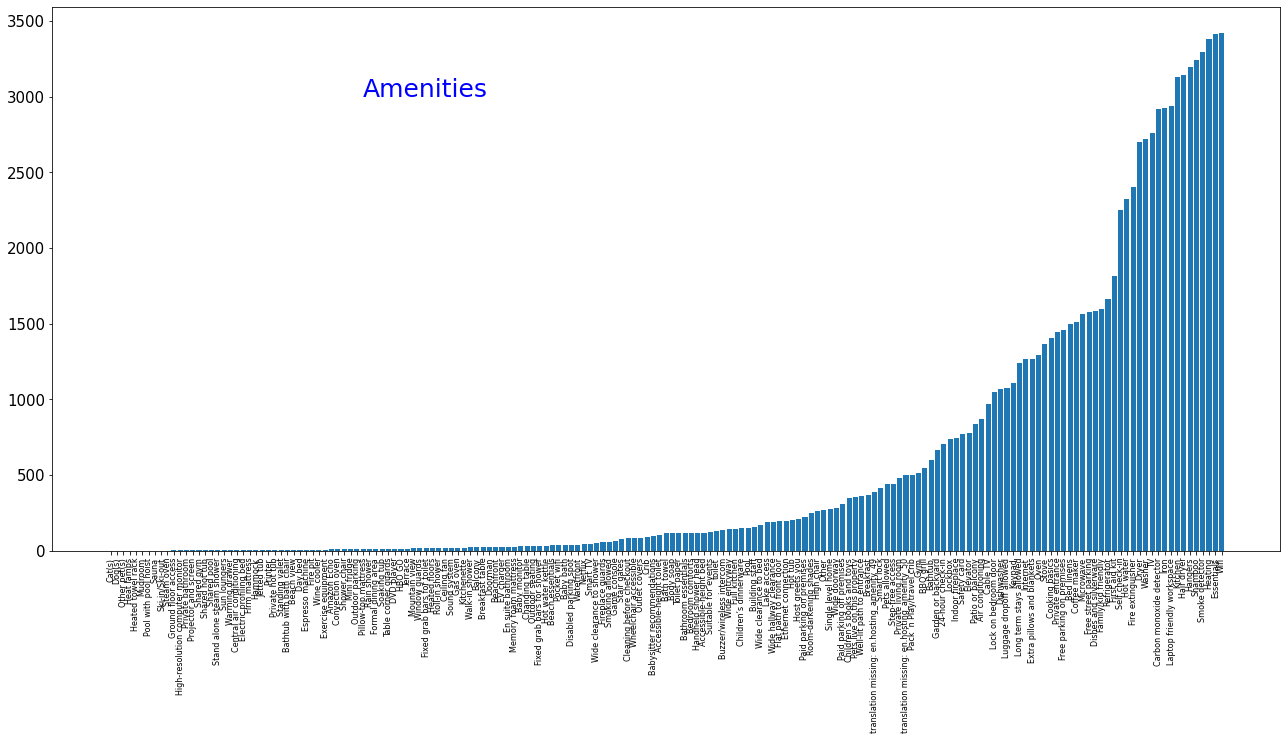

In [1017]:
aminity_tuple = sorted(amenities_dict.items(), key = lambda kv:(kv[1], kv[0]))[:-1]
category = []
values = []
for i in range(len(aminity_tuple)):
  category.append(aminity_tuple[i][0])
  values.append(aminity_tuple[i][1])

import matplotlib.pyplot as plt

plt.figure(figsize= (22,10))
plt.bar(category , values)
plt.xticks(category, rotation='vertical', size = 8)
plt.text(40, 3000, 'Amenities',size= 25 , color = 'blue')
plt.yticks(size = 15)
plt.show()

Chosing Only top 90 Aminities

In [1018]:
n = len(aminity_tuple)
t_90_amenities = []
for i in range(n):
  if i > 90:
    break;
  t_90_amenities.append(aminity_tuple[n-i-1][0])

t_90_amenities

['Wifi',
 'Essentials',
 'Heating',
 'Smoke detector',
 'Shampoo',
 'Hangers',
 'Hair dryer',
 'Kitchen',
 'Laptop friendly workspace',
 'Iron',
 'Carbon monoxide detector',
 'TV',
 'Washer',
 'Dryer',
 'Fire extinguisher',
 'Hot water',
 'Self check-in',
 'First aid kit',
 'Refrigerator',
 'Family/kid friendly',
 'Dishes and silverware',
 'Free street parking',
 'Microwave',
 'Coffee maker',
 'Bed linens',
 'Free parking on premises',
 'Private entrance',
 'Cooking basics',
 'Stove',
 'Oven',
 'Extra pillows and blankets',
 'Internet',
 'Long term stays allowed',
 'Keypad',
 'Luggage dropoff allowed',
 'Dishwasher',
 'Lock on bedroom door',
 'Cable TV',
 'Air conditioning',
 'Patio or balcony',
 'Elevator',
 'Safety card',
 'Indoor fireplace',
 'Lockbox',
 '24-hour check-in',
 'Garden or backyard',
 'Bathtub',
 'BBQ grill',
 'Gym',
 'Pack ’n Play/travel crib',
 'translation missing: en.hosting_amenity_50',
 'Private living room',
 'Step-free access',
 'Pets allowed',
 'Smart lock',
 '

Here we are considering only top 50% amemities rather than taking all of them since most of them are not quite useful in predicting the price

In [1019]:
for i in t_90_amenities:
  train.loc[train['amenities'].str.contains(i), i] = 1
  train.loc[~train['amenities'].str.contains(i), i] = 0

In [1020]:
train.head(5)

,host_is_superhost,host_response_rate,host_listings_count,host_identity_verified,accommodates,neighbourhood_group_cleansed,property_type,room_type,latitude,longitude,guests_included,bathrooms,bedrooms,beds,bed_type,amenities,cleaning_fee,minimum_nights,maximum_nights,instant_bookable,cancellation_policy,price,a few days or more,within a day,within a few hours,within an hour,Wifi,Essentials,Heating,Smoke detector,Shampoo,Hangers,Hair dryer,Kitchen,Laptop friendly workspace,Iron,Carbon monoxide detector,TV,Washer,Dryer,...,Private living room,Step-free access,Pets allowed,Smart lock,translation missing: en.hosting_amenity_49,Breakfast,Well-lit path to entrance,Pets live on this property,Children’s books and toys,Paid parking off premises,Wide doorway,Single level home,Other,High chair,Room-darkening shades,Paid parking on premises,Host greets you,Hot tub,Ethernet connection,Flat path to front door,Wide hallway clearance,Lake access,Wide clearance to bed,Building staff,Pool,Children’s dinnerware,Full kitchen,Wide entryway,Buzzer/wireless intercom,toilet,Suitable for events,Accessible-height bed,Handheld shower head,Bedroom comforts,Bathroom essentials,Toilet paper,Body soap,Bath towel,Accessible-height toilet,Babysitter recommendations
0,0,99.0,521,0,5,Downtown,Apartment,Entire home/apt,47.612163,-122.338239,4,2.0,2,2,Real Bed,TV Internet Wifi Kitchen Elevator Heating Fami...,129.0,2,1125,1,strict,279.0,0,0,0,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,100.0,1,1,2,Queen Anne,House,Entire home/apt,47.640827,-122.355248,1,1.0,0,1,Real Bed,TV Cable TV Internet Wifi Air conditioning Kit...,50.0,2,30,1,moderate,99.0,0,0,0,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,100.0,1,0,4,Rainier Valley,Guest suite,Entire home/apt,47.549007,-122.273951,2,1.0,1,2,Real Bed,TV Wifi Air conditioning Kitchen Free street p...,25.0,2,28,0,moderate,75.0,0,0,0,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,90.0,1,1,2,Central Area,House,Private room,47.601922,-122.307979,1,1.0,1,1,Real Bed,Internet Wifi Kitchen Pets live on this proper...,0.0,2,30,0,flexible,70.0,0,0,1,0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,100.0,4,1,8,Beacon Hill,House,Entire home/apt,47.552311,-122.293409,6,2.5,3,3,Real Bed,TV Wifi Kitchen Free parking on premises Smoki...,99.0,2,12,0,flexible,242.0,0,0,0,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [1021]:
train.drop(columns = ['amenities'], inplace=True)
train.head(5)

,host_is_superhost,host_response_rate,host_listings_count,host_identity_verified,accommodates,neighbourhood_group_cleansed,property_type,room_type,latitude,longitude,guests_included,bathrooms,bedrooms,beds,bed_type,cleaning_fee,minimum_nights,maximum_nights,instant_bookable,cancellation_policy,price,a few days or more,within a day,within a few hours,within an hour,Wifi,Essentials,Heating,Smoke detector,Shampoo,Hangers,Hair dryer,Kitchen,Laptop friendly workspace,Iron,Carbon monoxide detector,TV,Washer,Dryer,Fire extinguisher,...,Private living room,Step-free access,Pets allowed,Smart lock,translation missing: en.hosting_amenity_49,Breakfast,Well-lit path to entrance,Pets live on this property,Children’s books and toys,Paid parking off premises,Wide doorway,Single level home,Other,High chair,Room-darkening shades,Paid parking on premises,Host greets you,Hot tub,Ethernet connection,Flat path to front door,Wide hallway clearance,Lake access,Wide clearance to bed,Building staff,Pool,Children’s dinnerware,Full kitchen,Wide entryway,Buzzer/wireless intercom,toilet,Suitable for events,Accessible-height bed,Handheld shower head,Bedroom comforts,Bathroom essentials,Toilet paper,Body soap,Bath towel,Accessible-height toilet,Babysitter recommendations
0,0,99.0,521,0,5,Downtown,Apartment,Entire home/apt,47.612163,-122.338239,4,2.0,2,2,Real Bed,129.0,2,1125,1,strict,279.0,0,0,0,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,100.0,1,1,2,Queen Anne,House,Entire home/apt,47.640827,-122.355248,1,1.0,0,1,Real Bed,50.0,2,30,1,moderate,99.0,0,0,0,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,100.0,1,0,4,Rainier Valley,Guest suite,Entire home/apt,47.549007,-122.273951,2,1.0,1,2,Real Bed,25.0,2,28,0,moderate,75.0,0,0,0,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,90.0,1,1,2,Central Area,House,Private room,47.601922,-122.307979,1,1.0,1,1,Real Bed,0.0,2,30,0,flexible,70.0,0,0,1,0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,100.0,4,1,8,Beacon Hill,House,Entire home/apt,47.552311,-122.293409,6,2.5,3,3,Real Bed,99.0,2,12,0,flexible,242.0,0,0,0,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Cancellation Policy:**

In [1022]:
train['cancellation_policy'].value_counts()

strict_14_with_grace_period    1294
moderate                       1280
flexible                        651
strict                          167
super_strict_30                  67
super_strict_60                   7
Name: cancellation_policy, dtype: int64

In [1023]:
#Creating Label Encoder for Cancelling Policy
le_cancel = LabelEncoder()
train['cancellation_policy']= le_cancel.fit_transform(train['cancellation_policy'])

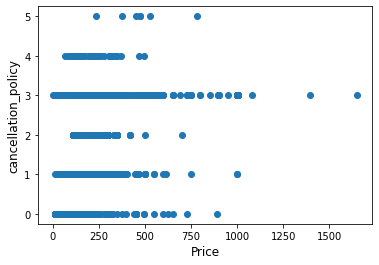

In [1024]:
import matplotlib.pyplot as plt
plt.scatter(train["price"], train["cancellation_policy"])
plt.xlabel("Price" , size = 12)
plt.ylabel('cancellation_policy', size = 12)
plt.show()

**Room type**

In [1025]:
train['room_type'].value_counts(normalize = True)

Entire home/apt    0.763993
Private room       0.213503
Shared room        0.022504
Name: room_type, dtype: float64

In [1026]:
room_one_hot = pd.get_dummies(train['room_type'])
train = train.drop('room_type', axis= 1)
train = train.join(room_one_hot)
train.head(5)

,host_is_superhost,host_response_rate,host_listings_count,host_identity_verified,accommodates,neighbourhood_group_cleansed,property_type,latitude,longitude,guests_included,bathrooms,bedrooms,beds,bed_type,cleaning_fee,minimum_nights,maximum_nights,instant_bookable,cancellation_policy,price,a few days or more,within a day,within a few hours,within an hour,Wifi,Essentials,Heating,Smoke detector,Shampoo,Hangers,Hair dryer,Kitchen,Laptop friendly workspace,Iron,Carbon monoxide detector,TV,Washer,Dryer,Fire extinguisher,Hot water,...,Smart lock,translation missing: en.hosting_amenity_49,Breakfast,Well-lit path to entrance,Pets live on this property,Children’s books and toys,Paid parking off premises,Wide doorway,Single level home,Other,High chair,Room-darkening shades,Paid parking on premises,Host greets you,Hot tub,Ethernet connection,Flat path to front door,Wide hallway clearance,Lake access,Wide clearance to bed,Building staff,Pool,Children’s dinnerware,Full kitchen,Wide entryway,Buzzer/wireless intercom,toilet,Suitable for events,Accessible-height bed,Handheld shower head,Bedroom comforts,Bathroom essentials,Toilet paper,Body soap,Bath towel,Accessible-height toilet,Babysitter recommendations,Entire home/apt,Private room,Shared room
0,0,99.0,521,0,5,Downtown,Apartment,47.612163,-122.338239,4,2.0,2,2,Real Bed,129.0,2,1125,1,2,279.0,0,0,0,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0
1,1,100.0,1,1,2,Queen Anne,House,47.640827,-122.355248,1,1.0,0,1,Real Bed,50.0,2,30,1,1,99.0,0,0,0,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0
2,1,100.0,1,0,4,Rainier Valley,Guest suite,47.549007,-122.273951,2,1.0,1,2,Real Bed,25.0,2,28,0,1,75.0,0,0,0,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0
3,1,90.0,1,1,2,Central Area,House,47.601922,-122.307979,1,1.0,1,1,Real Bed,0.0,2,30,0,0,70.0,0,0,1,0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0
4,1,100.0,4,1,8,Beacon Hill,House,47.552311,-122.293409,6,2.5,3,3,Real Bed,99.0,2,12,0,0,242.0,0,0,0,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0


**Bed Type:**

In [1027]:
train['bed_type'].value_counts()

Real Bed         3421
Futon              23
Pull-out Sofa      16
Airbed              6
Name: bed_type, dtype: int64

Since most the Bed_type represents just one cateogory, in others words not much significant spread is covered through this feature so we would drop this feature.

In [1028]:
train.drop( columns= ['bed_type'], inplace = True)

**Neighbourhood group Cleansed:**

In [1029]:
train['neighbourhood_group_cleansed'].value_counts(normalize = True)

Downtown               0.188113
Other neighborhoods    0.182054
Capitol Hill           0.113387
Central Area           0.084247
Queen Anne             0.069533
Ballard                0.054818
West Seattle           0.052510
Rainier Valley         0.045009
Cascade                0.041546
Beacon Hill            0.040681
University District    0.028275
Delridge               0.027409
Northgate              0.023370
Magnolia               0.019619
Lake City              0.015868
Seward Park            0.010964
Interbay               0.002597
Name: neighbourhood_group_cleansed, dtype: float64

In [1030]:
neighbour_one_hot = pd.get_dummies(train['neighbourhood_group_cleansed'])
train = train.drop('neighbourhood_group_cleansed', axis= 1)
train = train.join(neighbour_one_hot)
train.head(5)

,host_is_superhost,host_response_rate,host_listings_count,host_identity_verified,accommodates,property_type,latitude,longitude,guests_included,bathrooms,bedrooms,beds,cleaning_fee,minimum_nights,maximum_nights,instant_bookable,cancellation_policy,price,a few days or more,within a day,within a few hours,within an hour,Wifi,Essentials,Heating,Smoke detector,Shampoo,Hangers,Hair dryer,Kitchen,Laptop friendly workspace,Iron,Carbon monoxide detector,TV,Washer,Dryer,Fire extinguisher,Hot water,Self check-in,First aid kit,...,Wide hallway clearance,Lake access,Wide clearance to bed,Building staff,Pool,Children’s dinnerware,Full kitchen,Wide entryway,Buzzer/wireless intercom,toilet,Suitable for events,Accessible-height bed,Handheld shower head,Bedroom comforts,Bathroom essentials,Toilet paper,Body soap,Bath towel,Accessible-height toilet,Babysitter recommendations,Entire home/apt,Private room,Shared room,Ballard,Beacon Hill,Capitol Hill,Cascade,Central Area,Delridge,Downtown,Interbay,Lake City,Magnolia,Northgate,Other neighborhoods,Queen Anne,Rainier Valley,Seward Park,University District,West Seattle
0,0,99.0,521,0,5,Apartment,47.612163,-122.338239,4,2.0,2,2,129.0,2,1125,1,2,279.0,0,0,0,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,1,100.0,1,1,2,House,47.640827,-122.355248,1,1.0,0,1,50.0,2,30,1,1,99.0,0,0,0,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,1,100.0,1,0,4,Guest suite,47.549007,-122.273951,2,1.0,1,2,25.0,2,28,0,1,75.0,0,0,0,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,1,90.0,1,1,2,House,47.601922,-122.307979,1,1.0,1,1,0.0,2,30,0,0,70.0,0,0,1,0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,1,100.0,4,1,8,House,47.552311,-122.293409,6,2.5,3,3,99.0,2,12,0,0,242.0,0,0,0,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


**Property_Type :**

In [1031]:
train['property_type'].value_counts()

Apartment             1158
House                 1079
Guest suite            343
Townhouse              292
Condominium            193
Guesthouse             105
Serviced apartment      89
Loft                    48
Bungalow                40
Aparthotel              26
Cottage                 18
Tiny house              12
Cabin                   12
Boat                     9
Camper/RV                9
Houseboat                7
Other                    7
Bed and breakfast        6
Hostel                   4
Tent                     3
Villa                    1
In-law                   1
Yurt                     1
Boutique hotel           1
Farm stay                1
Resort                   1
Name: property_type, dtype: int64

Since most of category in propert type represents House and Apartment we will try to classify other property types into the same category and if some category is left we'll pass it to new category as others.


In [1032]:
# Replacing categories that are types of houses or apartments
train['property_type'].replace({
    'Guest suite': 'House',
    'Townhouse': 'House',
    'Serviced apartment': 'Apartment',
    'Loft': 'Apartment',
    'Bungalow': 'House',
    'Cottage': 'House',
    'Villa': 'House',
    'Tiny house': 'House',
    'Earth house': 'House',
    'Chalet': 'House'  }, inplace=True)

# Replacing other categories with 'Other_Property'
train.loc[~train['property_type'].isin(['House', 'Apartment']), 'property_type'] = 'Other_Property'
train.head(5)

,host_is_superhost,host_response_rate,host_listings_count,host_identity_verified,accommodates,property_type,latitude,longitude,guests_included,bathrooms,bedrooms,beds,cleaning_fee,minimum_nights,maximum_nights,instant_bookable,cancellation_policy,price,a few days or more,within a day,within a few hours,within an hour,Wifi,Essentials,Heating,Smoke detector,Shampoo,Hangers,Hair dryer,Kitchen,Laptop friendly workspace,Iron,Carbon monoxide detector,TV,Washer,Dryer,Fire extinguisher,Hot water,Self check-in,First aid kit,...,Wide hallway clearance,Lake access,Wide clearance to bed,Building staff,Pool,Children’s dinnerware,Full kitchen,Wide entryway,Buzzer/wireless intercom,toilet,Suitable for events,Accessible-height bed,Handheld shower head,Bedroom comforts,Bathroom essentials,Toilet paper,Body soap,Bath towel,Accessible-height toilet,Babysitter recommendations,Entire home/apt,Private room,Shared room,Ballard,Beacon Hill,Capitol Hill,Cascade,Central Area,Delridge,Downtown,Interbay,Lake City,Magnolia,Northgate,Other neighborhoods,Queen Anne,Rainier Valley,Seward Park,University District,West Seattle
0,0,99.0,521,0,5,Apartment,47.612163,-122.338239,4,2.0,2,2,129.0,2,1125,1,2,279.0,0,0,0,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,1,100.0,1,1,2,House,47.640827,-122.355248,1,1.0,0,1,50.0,2,30,1,1,99.0,0,0,0,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,1,100.0,1,0,4,House,47.549007,-122.273951,2,1.0,1,2,25.0,2,28,0,1,75.0,0,0,0,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,1,90.0,1,1,2,House,47.601922,-122.307979,1,1.0,1,1,0.0,2,30,0,0,70.0,0,0,1,0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,1,100.0,4,1,8,House,47.552311,-122.293409,6,2.5,3,3,99.0,2,12,0,0,242.0,0,0,0,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [1033]:
property_one_hot = pd.get_dummies(train['property_type'])
train = train.drop('property_type', axis= 1)
train = train.join(property_one_hot)
train.head(5)

,host_is_superhost,host_response_rate,host_listings_count,host_identity_verified,accommodates,latitude,longitude,guests_included,bathrooms,bedrooms,beds,cleaning_fee,minimum_nights,maximum_nights,instant_bookable,cancellation_policy,price,a few days or more,within a day,within a few hours,within an hour,Wifi,Essentials,Heating,Smoke detector,Shampoo,Hangers,Hair dryer,Kitchen,Laptop friendly workspace,Iron,Carbon monoxide detector,TV,Washer,Dryer,Fire extinguisher,Hot water,Self check-in,First aid kit,Refrigerator,...,Building staff,Pool,Children’s dinnerware,Full kitchen,Wide entryway,Buzzer/wireless intercom,toilet,Suitable for events,Accessible-height bed,Handheld shower head,Bedroom comforts,Bathroom essentials,Toilet paper,Body soap,Bath towel,Accessible-height toilet,Babysitter recommendations,Entire home/apt,Private room,Shared room,Ballard,Beacon Hill,Capitol Hill,Cascade,Central Area,Delridge,Downtown,Interbay,Lake City,Magnolia,Northgate,Other neighborhoods,Queen Anne,Rainier Valley,Seward Park,University District,West Seattle,Apartment,House,Other_Property
0,0,99.0,521,0,5,47.612163,-122.338239,4,2.0,2,2,129.0,2,1125,1,2,279.0,0,0,0,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,1,100.0,1,1,2,47.640827,-122.355248,1,1.0,0,1,50.0,2,30,1,1,99.0,0,0,0,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2,1,100.0,1,0,4,47.549007,-122.273951,2,1.0,1,2,25.0,2,28,0,1,75.0,0,0,0,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,1,90.0,1,1,2,47.601922,-122.307979,1,1.0,1,1,0.0,2,30,0,0,70.0,0,0,1,0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,1,100.0,4,1,8,47.552311,-122.293409,6,2.5,3,3,99.0,2,12,0,0,242.0,0,0,0,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


Dropping Latitude and Longitude information

In [1034]:
train.drop(columns= ['latitude','longitude'], inplace=True)
train.head(5)

,host_is_superhost,host_response_rate,host_listings_count,host_identity_verified,accommodates,guests_included,bathrooms,bedrooms,beds,cleaning_fee,minimum_nights,maximum_nights,instant_bookable,cancellation_policy,price,a few days or more,within a day,within a few hours,within an hour,Wifi,Essentials,Heating,Smoke detector,Shampoo,Hangers,Hair dryer,Kitchen,Laptop friendly workspace,Iron,Carbon monoxide detector,TV,Washer,Dryer,Fire extinguisher,Hot water,Self check-in,First aid kit,Refrigerator,Family/kid friendly,Dishes and silverware,...,Building staff,Pool,Children’s dinnerware,Full kitchen,Wide entryway,Buzzer/wireless intercom,toilet,Suitable for events,Accessible-height bed,Handheld shower head,Bedroom comforts,Bathroom essentials,Toilet paper,Body soap,Bath towel,Accessible-height toilet,Babysitter recommendations,Entire home/apt,Private room,Shared room,Ballard,Beacon Hill,Capitol Hill,Cascade,Central Area,Delridge,Downtown,Interbay,Lake City,Magnolia,Northgate,Other neighborhoods,Queen Anne,Rainier Valley,Seward Park,University District,West Seattle,Apartment,House,Other_Property
0,0,99.0,521,0,5,4,2.0,2,2,129.0,2,1125,1,2,279.0,0,0,0,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,1,100.0,1,1,2,1,1.0,0,1,50.0,2,30,1,1,99.0,0,0,0,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2,1,100.0,1,0,4,2,1.0,1,2,25.0,2,28,0,1,75.0,0,0,0,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,1,90.0,1,1,2,1,1.0,1,1,0.0,2,30,0,0,70.0,0,0,1,0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,1,100.0,4,1,8,6,2.5,3,3,99.0,2,12,0,0,242.0,0,0,0,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


**Multi-Collinearity:**

The process we would use  for this would be Variance Inflation Factor (VIF). When some features are highly correlated, we might have difficulty in distinguishing between their individual effects on the dependent variable.

In VIF method, we pick each feature and regress it against all of the other features. For each regression, the factor is calculated as :

VIF = 1\1-R^2

Where, R-squared is the coefficient of determination in linear regression. Its value lies between 0 and 1.

Greater the value of R-squared, Greater is the VIF.

Generally, a VIF above 5 indicates a high multicollinearity.

In [1035]:
#Separating Dependent and Independent Variable
#X = train.drop(columns=['price'])
#Y = train['price']

from statsmodels.stats.outliers_influence import variance_inflation_factor 

# VIF dataframe 
threshold = 5.0
vif_data = pd.DataFrame() 
vif_data["feature"] = train.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(train.values, i) 
                          for i in range(train.shape[1])] 


collinear_columns = list(vif_data[vif_data['VIF'] > 5]['feature'].values)
print('Total number oF Columns which are more than the threhold value of VIF: ', len(non_collinear_columns))

Total number oF Columns which are more than the threhold value of VIF:  46


In [1036]:
train.drop(columns= collinear_columns, inplace= True)
train.head(5)

,host_is_superhost,host_response_rate,host_listings_count,host_identity_verified,guests_included,bathrooms,bedrooms,beds,cleaning_fee,minimum_nights,maximum_nights,instant_bookable,cancellation_policy,price,Wifi,Essentials,Heating,Smoke detector,Shampoo,Hangers,Hair dryer,Kitchen,Laptop friendly workspace,Iron,Carbon monoxide detector,TV,Fire extinguisher,Hot water,First aid kit,Family/kid friendly,Free street parking,Coffee maker,Bed linens,Free parking on premises,Private entrance,Extra pillows and blankets,Internet,Long term stays allowed,Luggage dropoff allowed,Dishwasher,...,24-hour check-in,Garden or backyard,Bathtub,BBQ grill,Gym,Pack ’n Play/travel crib,translation missing: en.hosting_amenity_50,Private living room,Step-free access,Pets allowed,Smart lock,translation missing: en.hosting_amenity_49,Breakfast,Well-lit path to entrance,Pets live on this property,Children’s books and toys,Paid parking off premises,Wide doorway,Single level home,Other,High chair,Room-darkening shades,Paid parking on premises,Host greets you,Hot tub,Ethernet connection,Flat path to front door,Wide hallway clearance,Lake access,Wide clearance to bed,Building staff,Pool,Children’s dinnerware,Full kitchen,Wide entryway,Buzzer/wireless intercom,Suitable for events,Accessible-height bed,Handheld shower head,Babysitter recommendations
0,0,99.0,521,0,4,2.0,2,2,129.0,2,1125,1,2,279.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,100.0,1,1,1,1.0,0,1,50.0,2,30,1,1,99.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,100.0,1,0,2,1.0,1,2,25.0,2,28,0,1,75.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,90.0,1,1,1,1.0,1,1,0.0,2,30,0,0,70.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,100.0,4,1,6,2.5,3,3,99.0,2,12,0,0,242.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


**Scaling:**

In [1037]:
from sklearn.preprocessing import StandardScaler

df = train.drop(columns = ['price'])
price = train['price'].values
price = price.reshape(-1,1)
scaler = StandardScaler()
scaler_price = StandardScaler() # Creatring a different Standard Scaler object for price in order to inverse the Predictions at last
scaled_df = pd.DataFrame(scaler.fit_transform(df), columns= df.columns)
scaled_price = pd.DataFrame(scaler_price.fit_transform(price))
scaled_df.head(5) 

,host_is_superhost,host_response_rate,host_listings_count,host_identity_verified,guests_included,bathrooms,bedrooms,beds,cleaning_fee,minimum_nights,maximum_nights,instant_bookable,cancellation_policy,Wifi,Essentials,Heating,Smoke detector,Shampoo,Hangers,Hair dryer,Kitchen,Laptop friendly workspace,Iron,Carbon monoxide detector,TV,Fire extinguisher,Hot water,First aid kit,Family/kid friendly,Free street parking,Coffee maker,Bed linens,Free parking on premises,Private entrance,Extra pillows and blankets,Internet,Long term stays allowed,Luggage dropoff allowed,Dishwasher,Lock on bedroom door,...,24-hour check-in,Garden or backyard,Bathtub,BBQ grill,Gym,Pack ’n Play/travel crib,translation missing: en.hosting_amenity_50,Private living room,Step-free access,Pets allowed,Smart lock,translation missing: en.hosting_amenity_49,Breakfast,Well-lit path to entrance,Pets live on this property,Children’s books and toys,Paid parking off premises,Wide doorway,Single level home,Other,High chair,Room-darkening shades,Paid parking on premises,Host greets you,Hot tub,Ethernet connection,Flat path to front door,Wide hallway clearance,Lake access,Wide clearance to bed,Building staff,Pool,Children’s dinnerware,Full kitchen,Wide entryway,Buzzer/wireless intercom,Suitable for events,Accessible-height bed,Handheld shower head,Babysitter recommendations
0,-0.983404,0.101706,2.140404,-0.923301,1.027026,1.014366,0.590953,0.011323,1.018392,-0.126073,0.997020,0.839066,0.268468,0.113393,0.120983,0.156635,0.227107,0.260969,0.290071,0.321122,0.328719,0.424400,0.430067,0.433359,0.505764,0.664653,-1.424683,0.954855,1.079931,-0.913692,-0.878626,-0.873482,-0.852112,-0.846576,-0.758587,1.319882,-0.747766,-0.671429,-0.667813,-0.657893,...,-0.506663,-0.488159,-0.458471,-0.431479,-0.416322,-0.409621,-0.409141,2.497180,-0.381818,-0.380329,2.711422,-0.355043,-0.344130,-0.340975,-0.336742,-0.334081,-0.312298,-0.297603,-0.294143,-0.291239,-0.287727,-0.278211,-0.263482,-0.255246,-0.248117,-0.244824,-0.242832,-0.242165,-0.239483,-0.224992,-0.218547,-0.212686,-0.211199,-0.209704,-0.207445,-0.202863,-0.191816,-0.189377,-0.188558,-0.169682
1,1.016876,0.201145,-0.315752,1.083070,-0.607101,-0.472541,-1.311734,-0.632031,-0.335525,-0.126073,-1.066303,0.839066,-0.552811,0.113393,0.120983,0.156635,0.227107,0.260969,0.290071,0.321122,0.328719,0.424400,0.430067,0.433359,0.505764,-1.504544,0.701911,0.954855,-0.925985,1.094461,1.138141,1.144844,-0.852112,1.181228,-0.758587,1.319882,-0.747766,1.489362,1.497425,-0.657893,...,-0.506663,-0.488159,-0.458471,-0.431479,-0.416322,-0.409621,2.444145,-0.400452,-0.381818,-0.380329,-0.368810,2.816556,-0.344130,-0.340975,2.969629,-0.334081,-0.312298,-0.297603,-0.294143,-0.291239,-0.287727,-0.278211,-0.263482,-0.255246,-0.248117,-0.244824,-0.242832,-0.242165,-0.239483,-0.224992,-0.218547,-0.212686,-0.211199,4.768619,-0.207445,-0.202863,-0.191816,-0.189377,-0.188558,-0.169682
2,1.016876,0.201145,-0.315752,-0.923301,-0.062392,-0.472541,-0.360391,0.011323,-0.763980,-0.126073,-1.070072,-1.191802,-0.552811,0.113393,0.120983,0.156635,0.227107,0.260969,0.290071,0.321122,0.328719,0.424400,0.430067,0.433359,0.505764,0.664653,0.701911,0.954855,1.079931,1.094461,1.138141,1.144844,-0.852112,1.181228,-0.758587,-0.757643,-0.747766,-0.671429,-0.667813,-0.657893,...,-0.506663,-0.488159,-0.458471,-0.431479,-0.416322,-0.409621,-0.409141,2.497180,-0.381818,-0.380329,-0.368810,-0.355043,-0.344130,-0.340975,-0.336742,-0.334081,-0.312298,-0.297603,-0.294143,-0.291239,-0.287727,3.594395,-0.263482,-0.255246,-0.248117,-0.244824,-0.242832,-0.242165,-0.239483,-0.224992,-0.218547,-0.212686,-0.211199,-0.209704,-0.207445,-0.202863,-0.191816,-0.189377,-0.188558,-0.169682
3,1.016876,-0.793248,-0.315752,1.083070,-0.607101,-0.472541,-0.360391,-0.632031,-1.192434,-0.126073,-1.066303,-1.191802,-1.374089,0.113393,0.120983,0.156635,0.227107,0.260969,-3.447428,0.321122,0.328719,-2.356265,-2.325221,0.433359,-1.977207,-1.504544,0.701911,-1.047279,1.079931,1.094461,-0.878626,-0.873482,-0.8

**Spliting Data:**

In [1038]:
from sklearn.model_selection import train_test_split
X_train , X_cv, y_train , y_cv = train_test_split(scaled_df, scaled_price , test_size = 0.25 , random_state = 43)

# Modelling

Now we will use different models in order to evaluate the models performance. First we will use a simple **Linear Regression** model in order to get a baseline Accuracy which will the threshold mark. This value will then be compared by other complex models to have an idea about these performance.

**Linear Regression**

In [1039]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_cv)
y_pred_train = model.predict(X_train)


print('Training MSE: {:.4f}'.format(mean_squared_error(y_train, y_pred_train)))
print('Validation MSE: {:.4f}\n'.format(mean_squared_error(y_cv, y_pred)))
print('Training RSquared_Score: {:.4f}'.format(r2_score(y_train, y_pred_train)))
print('Validation RSquared_Score: {:.4f}'.format(r2_score(y_cv, y_pred)))

Training MSE: 0.3905
Validation MSE: 0.3928

Training RSquared_Score: 0.6295
Validation RSquared_Score: 0.5299


These Training and Validation accuracy will now be compared with other models performance value.

Now we'll use more complex model like Ensemble models.

In Ensemble model the two types of Regression Model we'll use would be

a.) Xgboost Regressor

b.) RandomForest Regressor

**Xgboost Regressor**

In [934]:
#Implementing XGBOOST Regressor
import xgboost 
from sklearn.metrics import mean_squared_error , r2_score

xg_reg = xgboost.XGBRFRegressor()
xg_reg.fit(X_train, y_train)

y_pred = xg_reg.predict(X_cv)
y_pred_train = xg_reg.predict(X_train)


print('Training MSE: {:.4f}'.format(mean_squared_error(y_train, y_pred_train)))
print('Validation MSE: {:.4f}\n'.format(mean_squared_error(y_cv, y_pred)))
print('Training RSquared_Score: {:.4f}'.format(r2_score(y_train, y_pred_train)))
print('Validation RSquared_Score: {:.4f}'.format(r2_score(y_cv, y_pred)))

[09:31:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Training MSE: 0.3292
Validation MSE: 0.2954

Training RSquared_Score: 0.6876
Validation RSquared_Score: 0.6465


**RandomForest Regressor**

In [935]:
#Implementing Random Forest Regressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error , r2_score

rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)

y_pred = rf_reg.predict(X_cv)
y_pred_train = rf_reg.predict(X_train)

print('Training MSE: {:.4f}'.format(mean_squared_error(y_train, y_pred_train)))
print('Validation MSE: {:.4f}\n'.format(mean_squared_error(y_cv, y_pred)))
print('Training RSquared_Score: {:.4f}'.format(r2_score(y_train, y_pred_train)))
print('Validation RSquared_Score: {:.4f}'.format(r2_score(y_cv, y_pred)))

Training MSE: 0.0385
Validation MSE: 0.2405

Training RSquared_Score: 0.9634
Validation RSquared_Score: 0.7122


We could observe that our ensemble models perform better than the linear Regression model which we used as a baseline performance model.
If we comapare the results of Xgboost Regreesor and RandomForest Regressor, RandomForest Regressor do provide better validation and Training performace and it seems to be overfitting while the performnace of Xgboost is underneath to that of RandomForest but it's not showing any symbol of Overfitting.

**Hyper tunning RandomForest Regressor:**

In [1040]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, mean_squared_error

# making a f1_score funtion separetly in order to fit that into RandomizedSearchCV
mse = make_scorer(mean_squared_error)
model = RandomForestRegressor()

#parameters considered for hyperparameter tunning are min_samples_split and n_estimators
parameters = {'min_samples_split' :[1,2,3,4],
              'n_estimators' : [100,300,500,1000,2000]}

cross_validation = RandomizedSearchCV(model, parameters, cv = 3 , scoring = mse , return_train_score= True, verbose = 5)
cross_validation.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] n_estimators=1000, min_samples_split=4 ..........................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1000, min_samples_split=4, score=(train=0.048, test=0.311), total=  17.3s
[CV] n_estimators=1000, min_samples_split=4 ..........................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   17.6s remaining:    0.0s


[CV]  n_estimators=1000, min_samples_split=4, score=(train=0.060, test=0.260), total=  17.4s
[CV] n_estimators=1000, min_samples_split=4 ..........................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   35.4s remaining:    0.0s


[CV]  n_estimators=1000, min_samples_split=4, score=(train=0.059, test=0.270), total=  17.2s
[CV] n_estimators=300, min_samples_split=1 ...........................
[CV]  n_estimators=300, min_samples_split=1, score=(train=nan, test=nan), total=   0.1s
[CV] n_estimators=300, min_samples_split=1 ...........................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   53.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   53.2s remaining:    0.0s


[CV]  n_estimators=300, min_samples_split=1, score=(train=nan, test=nan), total=   0.1s
[CV] n_estimators=300, min_samples_split=1 ...........................
[CV]  n_estimators=300, min_samples_split=1, score=(train=nan, test=nan), total=   0.1s
[CV] n_estimators=2000, min_samples_split=4 ..........................
[CV]  n_estimators=2000, min_samples_split=4, score=(train=0.048, test=0.309), total=  34.6s
[CV] n_estimators=2000, min_samples_split=4 ..........................
[CV]  n_estimators=2000, min_samples_split=4, score=(train=0.059, test=0.258), total=  34.7s
[CV] n_estimators=2000, min_samples_split=4 ..........................
[CV]  n_estimators=2000, min_samples_split=4, score=(train=0.057, test=0.271), total=  34.7s
[CV] n_estimators=1000, min_samples_split=2 ..........................
[CV]  n_estimators=1000, min_samples_split=2, score=(train=0.036, test=0.306), total=  19.6s
[CV] n_estimators=1000, min_samples_split=2 ..........................
[CV]  n_estimators=1000, m

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  5.5min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [1042]:
results = pd.DataFrame.from_dict(cross_validation.cv_results_)
results.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,17.115207,0.081362,0.200550,0.002174,1000,4,"{'n_estimators': 1000, 'min_samples_split': 4}",0.310675,0.260057,0.269659,0.280130,0.021951,4,0.048093,0.059822,0.058784,0.055566,0.005301
1,0.110664,0.002596,0.000000,0.000000,300,1,"{'n_estimators': 300, 'min_samples_split': 1}",NaN,NaN,NaN,NaN,NaN,8,NaN,NaN,NaN,NaN,NaN
2,34.261837,0.075935,0.403201,0.006797,2000,4,"{'n_estimators': 2000, 'min_samples_split': 4}",0.309283,0.258005,0.270567,0.279285,0.021823,5,0.048093,0.058964,0.056544,0.054533,0.004660
3,19.369589,0.013237,0.236505,0.004891,1000,2,"{'n_estimators': 1000, 'min_samples_split': 2}",0.306314,0.261813,0.274296,0.280808,0.018742,3,0.035699,0.041476,0.042566,0.039914,0.003013
4,1.809285,0.008090,0.027816,0.005424,100,3,"{'n_estimators': 100, 'min_samples_split': 3}",0.309819,0.273835,0.269374,0.284343,0.018106,1,0.044366,0.052986,0.054218,0.050523,0.004383


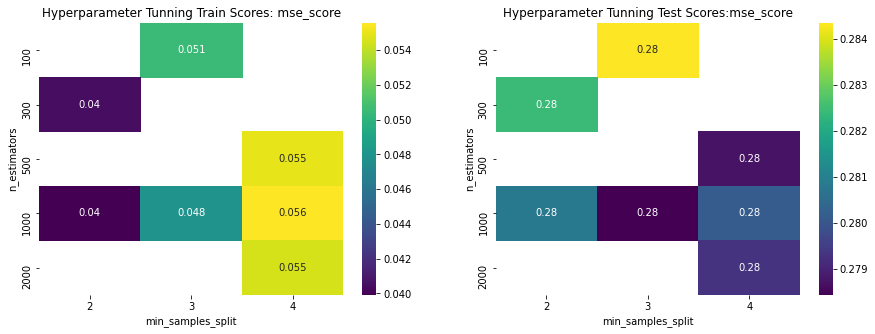

In [1043]:
#Creating a Heatmap for Visualizing F1-score using different values of parameters 
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.DataFrame()
df['n_estimators'] = results['param_n_estimators']
df['min_samples_split'] = results['param_min_samples_split']
df['train_score'] = results['mean_train_score']
df['test_score'] = results['mean_test_score']
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
heatmap_data1 = pd.pivot_table(df, values = 'train_score' , index = ['n_estimators'] , columns = 'min_samples_split')
sns.heatmap(heatmap_data1, annot = True , cmap="viridis")
plt.title('Hyperparameter Tunning Train Scores: mse_score')
plt.subplot(1,2,2)
heatmap_data2 = pd.pivot_table(df, values = 'test_score' , index = ['n_estimators'] , columns = 'min_samples_split')
sns.heatmap(heatmap_data2, annot = True , cmap="viridis")
plt.title('Hyperparameter Tunning Test Scores:mse_score')
plt.show()

In [1044]:
print('Best parameters for RadmomForest Regressor using Hyperparamtertunning:')
cross_validation.best_params_

Best parameters for RadmomForest Regressor using Hyperparamtertunning:


{'min_samples_split': 3, 'n_estimators': 100}

In [1045]:
#Implementing Random Forest Regressor with parameters through hyper parameter tunning 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error , r2_score

rf_reg = RandomForestRegressor(min_samples_split=3, n_estimators=100)
rf_reg.fit(X_train, y_train)

y_pred = rf_reg.predict(X_cv)
y_pred_train = rf_reg.predict(X_train)

print('Training MSE: {:.4f}'.format(mean_squared_error(y_train, y_pred_train)))
print('Validation MSE: {:.4f}\n'.format(mean_squared_error(y_cv, y_pred)))
print('Training RSquared_Score: {:.4f}'.format(r2_score(y_train, y_pred_train)))
print('Validation RSquared_Score: {:.4f}'.format(r2_score(y_cv, y_pred)))

Training MSE: 0.0466
Validation MSE: 0.2397

Training RSquared_Score: 0.9558
Validation RSquared_Score: 0.7131


Similar Hyper-parameter tunning could be performed over Xgboost in order to yield better and improvised results to that Regressor as well

**Model : ANN (Artificial Neural Network)**

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               8700      
_________________________________________________________________
dense_1 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_2 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 26        
Total params: 15,051
Trainable params: 15,051
Non-trainable params: 0
_________________________________________________________________


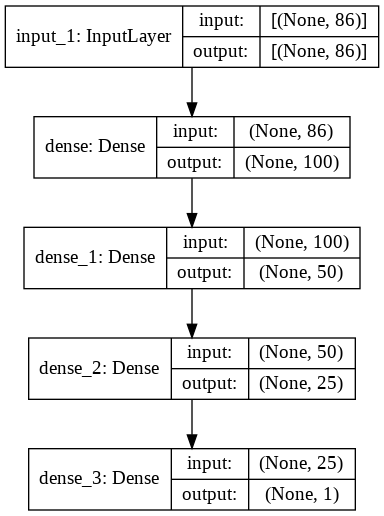

In [788]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Input
from tensorflow.keras.utils import plot_model
import os
import random
import numpy as np

tf.keras.backend.clear_session()
os.environ['PYTHONHASHSEED'] = '0'
np.random.seed(0)
random.seed(0)

model = Sequential()
model.add(Input(shape=X_train.shape[1]))
model.add(Dense(100, activation= 'relu'))
model.add(Dense(50, activation= 'relu'))
model.add(Dense(25, activation= 'relu'))
model.add(Dense(1, activation= 'linear'))

model.compile(optimizer= 'adam', loss = 'mean_squared_error' , metrics=['mean_squared_error'])
model.summary()
plot_model(model, show_shapes = True)

In [789]:
history = model.fit(X_train , y_train , epochs= 100 , batch_size=100 , validation_split= 0.2)

Epoch 1/100
21/21 [==============================] - 1s 29ms/step - loss: 1.1014 - mean_squared_error: 1.1014 - val_loss: 0.4848 - val_mean_squared_error: 0.4848
Epoch 2/100
21/21 [==============================] - 0s 4ms/step - loss: 0.5230 - mean_squared_error: 0.5230 - val_loss: 0.3667 - val_mean_squared_error: 0.3667
Epoch 3/100
21/21 [==============================] - 0s 4ms/step - loss: 0.3206 - mean_squared_error: 0.3206 - val_loss: 0.3080 - val_mean_squared_error: 0.3080
Epoch 4/100
21/21 [==============================] - 0s 4ms/step - loss: 0.2878 - mean_squared_error: 0.2878 - val_loss: 0.2793 - val_mean_squared_error: 0.2793
Epoch 5/100
21/21 [==============================] - 0s 4ms/step - loss: 0.2109 - mean_squared_error: 0.2109 - val_loss: 0.2691 - val_mean_squared_error: 0.2691
Epoch 6/100
21/21 [==============================] - 0s 4ms/step - loss: 0.1620 - mean_squared_error: 0.1620 - val_loss: 0.2669 - val_mean_squared_error: 0.2669
Epoch 7/100
21/21 [==============

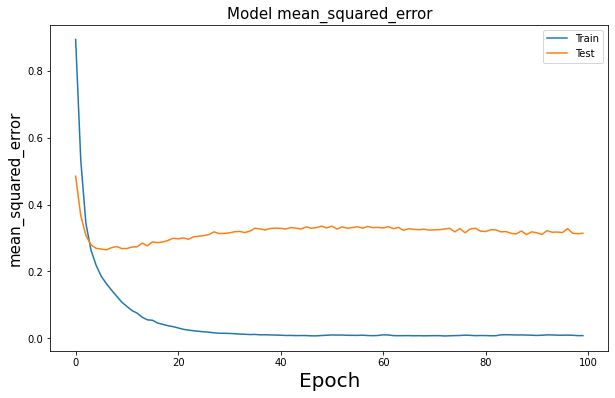

Training MSE: 0.0689
Validation MSE: 0.3738

Training RSquared_Score: 0.9346
Validation RSquared_Score: 0.5527


In [790]:
# Plot training & validation iou_score values
plt.figure(figsize=(10, 6))
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('Model mean_squared_error' ,fontdict= {'fontsize': 15})
plt.ylabel('mean_squared_error', fontdict= {'fontsize': 15})
plt.xlabel('Epoch', fontdict= {'fontsize': 20})
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

y_pred = model.predict(X_cv)
y_pred_train = model.predict(X_train)

print('Training MSE: {:.4f}'.format(mean_squared_error(y_train, y_pred_train)))
print('Validation MSE: {:.4f}\n'.format(mean_squared_error(y_cv, y_pred)))
print('Training RSquared_Score: {:.4f}'.format(r2_score(y_train, y_pred_train)))
print('Validation RSquared_Score: {:.4f}'.format(r2_score(y_cv, y_pred)))

We can oberve here that the model is overfitting a lot here , we need to find a way to fix this overfitting problem


a.) BatchNormalization

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               8700      
_________________________________________________________________
batch_normalization (BatchNo (None, 100)               400       
_________________________________________________________________
dense_1 (Dense)              (None, 50)                5050      
_________________________________________________________________
batch_normalization_1 (Batch (None, 50)                200       
_________________________________________________________________
dense_2 (Dense)              (None, 25)                1275      
_________________________________________________________________
batch_normalization_2 (Batch (None, 25)                100       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 2

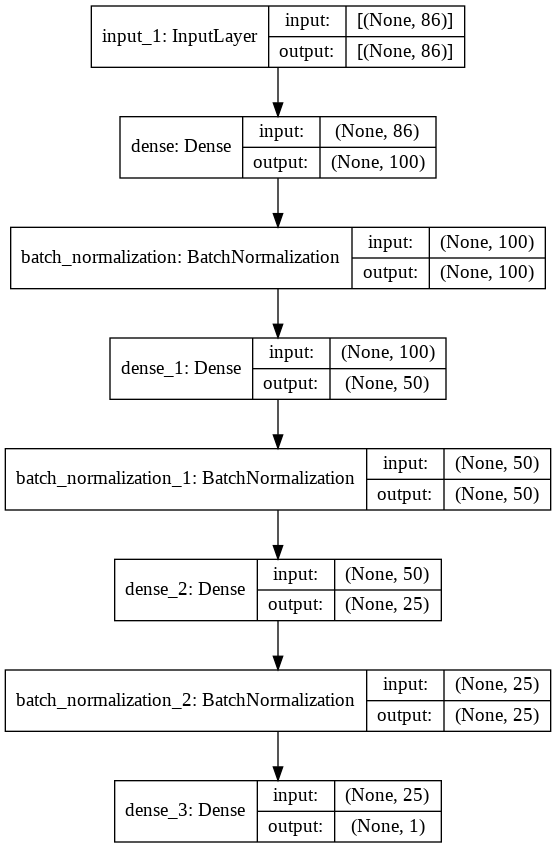

In [791]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Input , BatchNormalization
from tensorflow.keras.utils import plot_model
import os
import random
import numpy as np

tf.keras.backend.clear_session()
os.environ['PYTHONHASHSEED'] = '0'
np.random.seed(0)
random.seed(0)

model = Sequential()
model.add(Input(shape=X_train.shape[1]))
model.add(Dense(100, activation= 'relu'))
model.add(BatchNormalization())
model.add(Dense(50, activation= 'relu'))
model.add(BatchNormalization())
model.add(Dense(25, activation= 'relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation= 'linear'))

model.compile(optimizer= 'adam', loss = 'mean_squared_error' , metrics=['mean_squared_error'])
model.summary()
plot_model(model, show_shapes = True)

In [792]:
history = model.fit(X_train , y_train , epochs= 200 , batch_size=100 , validation_split= 0.2)

Epoch 1/200
21/21 [==============================] - 1s 19ms/step - loss: 2.1069 - mean_squared_error: 2.1069 - val_loss: 0.7104 - val_mean_squared_error: 0.7104
Epoch 2/200
21/21 [==============================] - 0s 5ms/step - loss: 0.6561 - mean_squared_error: 0.6561 - val_loss: 0.6084 - val_mean_squared_error: 0.6084
Epoch 3/200
21/21 [==============================] - 0s 5ms/step - loss: 0.4750 - mean_squared_error: 0.4750 - val_loss: 0.5365 - val_mean_squared_error: 0.5365
Epoch 4/200
21/21 [==============================] - 0s 5ms/step - loss: 0.3283 - mean_squared_error: 0.3283 - val_loss: 0.4771 - val_mean_squared_error: 0.4771
Epoch 5/200
21/21 [==============================] - 0s 4ms/step - loss: 0.2820 - mean_squared_error: 0.2820 - val_loss: 0.4416 - val_mean_squared_error: 0.4416
Epoch 6/200
21/21 [==============================] - 0s 4ms/step - loss: 0.2492 - mean_squared_error: 0.2492 - val_loss: 0.4217 - val_mean_squared_error: 0.4217
Epoch 7/200
21/21 [==============

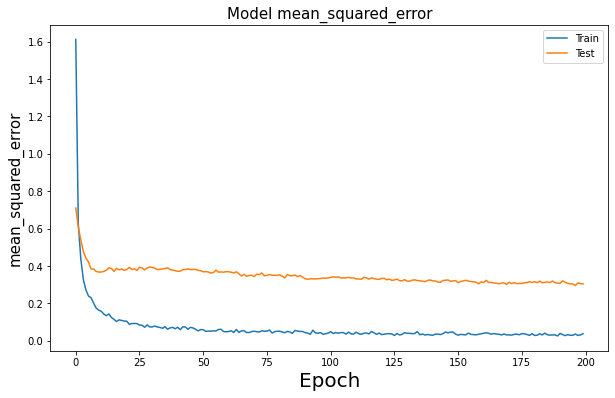

Training MSE: 0.0695
Validation MSE: 0.3057

Training RSquared_Score: 0.9341
Validation RSquared_Score: 0.6342


In [793]:
# Plot training & validation iou_score values
plt.figure(figsize=(10, 6))
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('Model mean_squared_error' ,fontdict= {'fontsize': 15})
plt.ylabel('mean_squared_error', fontdict= {'fontsize': 15})
plt.xlabel('Epoch', fontdict= {'fontsize': 20})
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

y_pred = model.predict(X_cv)
y_pred_train = model.predict(X_train)

print('Training MSE: {:.4f}'.format(mean_squared_error(y_train, y_pred_train)))
print('Validation MSE: {:.4f}\n'.format(mean_squared_error(y_cv, y_pred)))
print('Training RSquared_Score: {:.4f}'.format(r2_score(y_train, y_pred_train)))
print('Validation RSquared_Score: {:.4f}'.format(r2_score(y_cv, y_pred)))

We can see here that there is not much improvement in results using only BatchNormalization. Let's try adding Regularization as well to it

b.) Regularization & Dropout

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               8700      
_________________________________________________________________
batch_normalization (BatchNo (None, 100)               400       
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               20200     
_________________________________________________________________
batch_normalization_1 (Batch (None, 200)               800       
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               2

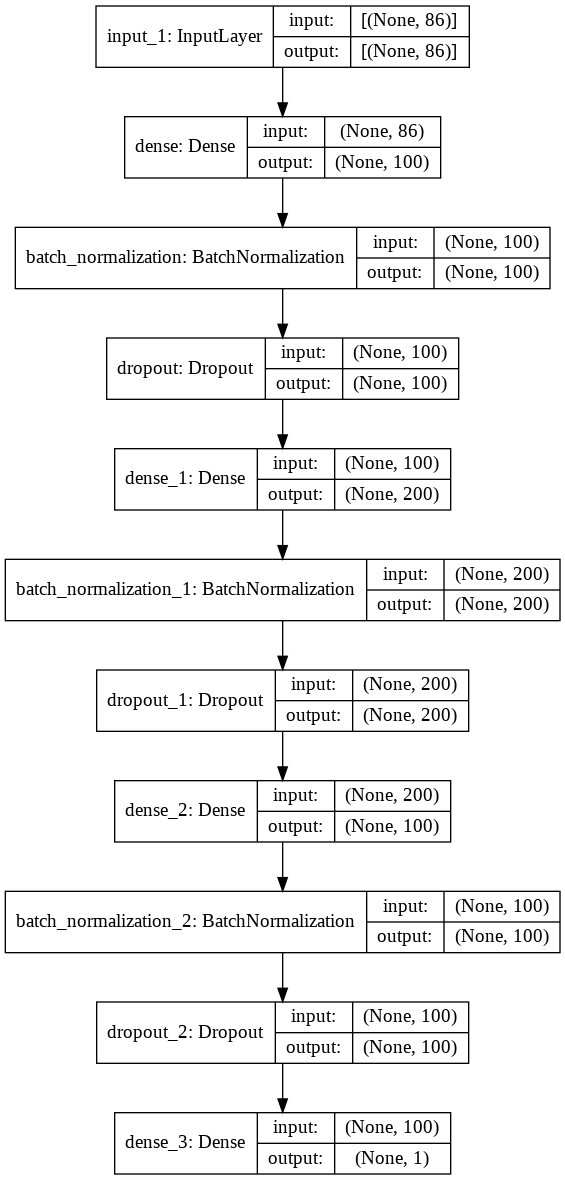

In [936]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Input , BatchNormalization , Dropout
from tensorflow.keras.utils import plot_model
import os
import random
import numpy as np

tf.keras.backend.clear_session()
os.environ['PYTHONHASHSEED'] = '0'
np.random.seed(0)
random.seed(0)

model = Sequential()
model.add(Input(shape=X_train.shape[1]))
model.add(Dense(100, activation= 'relu', kernel_regularizer=tf.keras.regularizers.L1(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.20))
model.add(Dense(200, activation= 'relu', kernel_regularizer=tf.keras.regularizers.L1(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.20))
model.add(Dense(100, activation= 'relu', kernel_regularizer=tf.keras.regularizers.L1(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.20))
model.add(Dense(1, activation= 'linear'))

model.compile(optimizer= 'adam', loss = 'mean_squared_error' , metrics=['mean_squared_error'])
model.summary()
model_checkpoint = tf.keras.callbacks.ModelCheckpoint('./best_model.h5', save_weights_only=True, save_best_only=True,mode='min',
                                                      monitor='val_mean_squared_error', verbose= 0)
plot_model(model, show_shapes = True)

In [937]:
history = model.fit(X_train , y_train , epochs= 200 , batch_size=100 , validation_split= 0.2 , callbacks= [model_checkpoint])

Epoch 1/200
21/21 [==============================] - 2s 26ms/step - loss: 37.9590 - mean_squared_error: 2.4831 - val_loss: 34.6729 - val_mean_squared_error: 0.6273
Epoch 2/200
21/21 [==============================] - 0s 8ms/step - loss: 35.1458 - mean_squared_error: 1.6011 - val_loss: 32.5851 - val_mean_squared_error: 0.5968
Epoch 3/200
21/21 [==============================] - 0s 7ms/step - loss: 32.5134 - mean_squared_error: 1.0588 - val_loss: 30.3329 - val_mean_squared_error: 0.5159
Epoch 4/200
21/21 [==============================] - 0s 8ms/step - loss: 30.3754 - mean_squared_error: 1.0997 - val_loss: 28.1510 - val_mean_squared_error: 0.5026
Epoch 5/200
21/21 [==============================] - 0s 8ms/step - loss: 27.9915 - mean_squared_error: 0.8796 - val_loss: 25.9921 - val_mean_squared_error: 0.4827
Epoch 6/200
21/21 [==============================] - 0s 8ms/step - loss: 25.7313 - mean_squared_error: 0.7412 - val_loss: 23.9044 - val_mean_squared_error: 0.4654
Epoch 7/200
21/21 [==

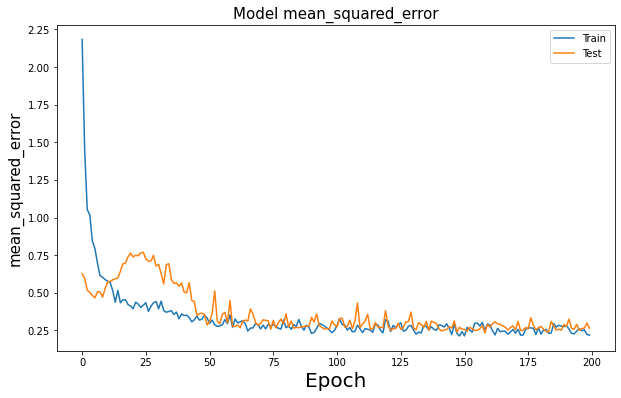

Performance of Best Model:
Training MSE: 0.1636
Validation MSE: 0.2692

Training RSquared_Score: 0.8447
Validation RSquared_Score: 0.6779


In [938]:
# Plot training & validation iou_score values
plt.figure(figsize=(10, 6))
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('Model mean_squared_error' ,fontdict= {'fontsize': 15})
plt.ylabel('mean_squared_error', fontdict= {'fontsize': 15})
plt.xlabel('Epoch', fontdict= {'fontsize': 20})
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

model.load_weights('/content/best_model.h5')
y_pred = model.predict(X_cv)
y_pred_train = model.predict(X_train)

print('Performance of Best Model:')
print('Training MSE: {:.4f}'.format(mean_squared_error(y_train, y_pred_train)))
print('Validation MSE: {:.4f}\n'.format(mean_squared_error(y_cv, y_pred)))
print('Training RSquared_Score: {:.4f}'.format(r2_score(y_train, y_pred_train)))
print('Validation RSquared_Score: {:.4f}'.format(r2_score(y_cv, y_pred)))

# Model Selection:

The best Artificial Neural Network Model perfoms little better than Our Ensemble Xgboost model with Regularizer, BatchNormalization and Dorput. Overfitting seems to be quite low in this model and also the Mean squared error over validation data is lesser than what we were getting through XGBoost Regressor. The MSE value we got through RandomForest Regressor quite low as well but it was overfitting by a large margin which makes over model quite unstable thats why I didn't choose that model.

# Test Data Prediction:

**Importing Test Data**

In [939]:
test_data = pd.read_csv('/content/drive/MyDrive/price_test.csv')
test_data

,X1,id,host_is_superhost,host_response_rate,host_response_time,host_listings_count,host_identity_verified,accommodates,neighbourhood_group_cleansed,property_type,room_type,latitude,longitude,guests_included,bathrooms,bedrooms,beds,bed_type,amenities,cleaning_fee,minimum_nights,maximum_nights,instant_bookable,cancellation_policy
0,130,392779,False,90%,within an hour,1,True,4,Beacon Hill,Guest suite,Entire home/apt,47.575769,-122.316362,2,1.0,2,2,Real Bed,"{TV,Internet,Wifi,Kitchen,""Free street parking...",$85.00,3,300,True,moderate
1,2425,12456183,True,86%,within a day,1,False,4,Lake City,Guest suite,Entire home/apt,47.711951,-122.302355,1,1.0,1,2,Real Bed,"{TV,Wifi,""Free parking on premises"",""Pets allo...",$40.00,2,1125,True,moderate
2,432,1851863,True,100%,within an hour,1,True,2,Northgate,Apartment,Entire home/apt,47.697103,-122.344556,1,1.0,1,1,Real Bed,"{Wifi,Kitchen,""Free parking on premises"",Heati...",$150.00,5,120,False,strict_14_with_grace_period
3,5994,23309878,True,100%,within an hour,2,True,2,Downtown,Apartment,Entire home/apt,47.612364,-122.349425,1,1.0,1,1,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Paid park...",$75.00,1,30,False,strict_14_with_grace_period
4,2110,10768347,False,100%,within an hour,1,False,2,Other neighborhoods,House,Private room,47.687264,-122.313444,1,1.0,1,1,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",0,1,3,False,flexible
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1729,4349,19350610,False,92%,within an hour,51,True,3,University District,Apartment,Entire home/apt,47.658539,-122.316761,1,1.0,1,1,Real Bed,"{TV,Wifi,Kitchen,""Free parking on premises"",""P...",$60.00,2,1125,False,moderate
1730,1580,7886656,True,100%,within an hour,2,True,4,West Seattle,Apartment,Entire home/apt,47.559256,-122.384556,1,1.0,2,2,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Wheelchair acces...",$50.00,2,29,True,moderate
1731,679,3535171,True,100%,within an hour,2,True,2,Other neighborhoods,House,Private room,47.687966,-122.352905,1,1.0,1,1,Real Bed,"{TV,Internet,Wifi,""Pets live on this property""...",$25.00,1,29,False,strict_14_with_grace_period
1732,7360,27930170,False,100%,within an hour,1,False,4,Central Area,Guest suite,Entire home/apt,47.615843,-122.299203,2,1.0,1,2,Real Bed,"{Wifi,Kitchen,""Free parking on premises"",""Free...",$75.00,3,1125,True,strict_14_with_grace_period


In [940]:
test_id = test_data['id']

**Preprocessing of Test Data same as Training Data**

In [941]:
test_data.drop(columns= ['id', 'X1'], inplace= True)

In [942]:
test_data['host_is_superhost']= le_superhost.transform(test_data['host_is_superhost'])
test_data['host_identity_verified']= le_identity.transform(test_data['host_identity_verified'])
test_data['instant_bookable']= le_instant.transform(test_data['instant_bookable'])

import re
test_data['host_response_rate'] = test_data['host_response_rate'].apply(lambda x: re.sub(r'[%]', '', x))
test_data['host_response_rate'] = test_data['host_response_rate'].astype('float64')

response_time_one_hot = pd.get_dummies(test_data['host_response_time'])
test_data = test_data.drop('host_response_time', axis= 1)
test_data = test_data.join(response_time_one_hot)

test_data = text_preprocessing(test_data, 'amenities')
for i in t_90_amenities:
  test_data.loc[test_data['amenities'].str.contains(i), i] = 1
  test_data.loc[~test_data['amenities'].str.contains(i), i] = 0

test_data.drop(columns = ['amenities'], inplace = True)

test_data['cancellation_policy']= le_cancel.transform(test_data['cancellation_policy'])
test_data['cleaning_fee'] = test_data['cleaning_fee'].apply(lambda x: x.replace('$', ''))
test_data['cleaning_fee'] = test_data['cleaning_fee'].apply(lambda x: x.replace(',', ''))
test_data['cleaning_fee'] = test_data['cleaning_fee'].astype(float)

room_one_hot = pd.get_dummies(test_data['room_type'])
test_data = test_data.drop('room_type', axis= 1)
test_data = test_data.join(room_one_hot)

test_data.drop( columns= ['bed_type'], inplace = True)

neighbour_one_hot = pd.get_dummies(test_data['neighbourhood_group_cleansed'])
test_data = test_data.drop('neighbourhood_group_cleansed', axis= 1)
test_data = test_data.join(neighbour_one_hot)

test_data['property_type'].replace({
    'Guest suite': 'House',
    'Townhouse': 'House',
    'Serviced apartment': 'Apartment',
    'Loft': 'Apartment',
    'Bungalow': 'House',
    'Cottage': 'House',
    'Villa': 'House',
    'Tiny house': 'House',
    'Earth house': 'House',
    'Chalet': 'House'  }, inplace=True)

# Replacing other categories with 'Other_Property'
test_data.loc[~test_data['property_type'].isin(['House', 'Apartment']), 'property_type'] = 'Other_Property'

property_one_hot = pd.get_dummies(test_data['property_type'])
test_data = test_data.drop('property_type', axis= 1)
test_data = test_data.join(property_one_hot)

test_data.drop(columns= ['latitude','longitude'], inplace=True)
test_data.drop(columns= collinear_columns, inplace= True)


test_data.head(5)

,host_is_superhost,host_response_rate,host_listings_count,host_identity_verified,guests_included,bathrooms,bedrooms,beds,cleaning_fee,minimum_nights,maximum_nights,instant_bookable,cancellation_policy,Wifi,Essentials,Heating,Smoke detector,Shampoo,Hangers,Hair dryer,Kitchen,Laptop friendly workspace,Iron,Carbon monoxide detector,TV,Fire extinguisher,Hot water,First aid kit,Family/kid friendly,Free street parking,Coffee maker,Bed linens,Free parking on premises,Private entrance,Extra pillows and blankets,Internet,Long term stays allowed,Luggage dropoff allowed,Dishwasher,Lock on bedroom door,...,24-hour check-in,Garden or backyard,Bathtub,BBQ grill,Gym,Pack ’n Play/travel crib,translation missing: en.hosting_amenity_50,Private living room,Step-free access,Pets allowed,Smart lock,translation missing: en.hosting_amenity_49,Breakfast,Well-lit path to entrance,Pets live on this property,Children’s books and toys,Paid parking off premises,Wide doorway,Single level home,Other,High chair,Room-darkening shades,Paid parking on premises,Host greets you,Hot tub,Ethernet connection,Flat path to front door,Wide hallway clearance,Lake access,Wide clearance to bed,Building staff,Pool,Children’s dinnerware,Full kitchen,Wide entryway,Buzzer/wireless intercom,Suitable for events,Accessible-height bed,Handheld shower head,Babysitter recommendations
0,0,90.0,1,1,2,1.0,2,2,85.0,3,300,1,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,86.0,1,0,1,1.0,1,2,40.0,2,1125,1,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,100.0,1,1,1,1.0,1,1,150.0,5,120,0,3,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,100.0,2,1,1,1.0,1,1,75.0,1,30,0,3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,100.0,1,0,1,1.0,1,1,0.0,1,3,0,0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Scaling Test Data**

In [943]:
test_data = pd.DataFrame(scaler.transform(test_data), columns= test_data.columns)
test_data.head(5)

,host_is_superhost,host_response_rate,host_listings_count,host_identity_verified,guests_included,bathrooms,bedrooms,beds,cleaning_fee,minimum_nights,maximum_nights,instant_bookable,cancellation_policy,Wifi,Essentials,Heating,Smoke detector,Shampoo,Hangers,Hair dryer,Kitchen,Laptop friendly workspace,Iron,Carbon monoxide detector,TV,Fire extinguisher,Hot water,First aid kit,Family/kid friendly,Free street parking,Coffee maker,Bed linens,Free parking on premises,Private entrance,Extra pillows and blankets,Internet,Long term stays allowed,Luggage dropoff allowed,Dishwasher,Lock on bedroom door,...,24-hour check-in,Garden or backyard,Bathtub,BBQ grill,Gym,Pack ’n Play/travel crib,translation missing: en.hosting_amenity_50,Private living room,Step-free access,Pets allowed,Smart lock,translation missing: en.hosting_amenity_49,Breakfast,Well-lit path to entrance,Pets live on this property,Children’s books and toys,Paid parking off premises,Wide doorway,Single level home,Other,High chair,Room-darkening shades,Paid parking on premises,Host greets you,Hot tub,Ethernet connection,Flat path to front door,Wide hallway clearance,Lake access,Wide clearance to bed,Building staff,Pool,Children’s dinnerware,Full kitchen,Wide entryway,Buzzer/wireless intercom,Suitable for events,Accessible-height bed,Handheld shower head,Babysitter recommendations
0,-0.983404,-0.793248,-0.315752,1.083070,-0.062392,-0.472541,0.590953,0.011323,0.264312,-0.031183,-0.557539,0.839066,-0.552811,0.113393,0.120983,0.156635,0.227107,0.260969,0.290071,0.321122,0.328719,0.424400,0.430067,0.433359,0.505764,0.664653,0.701911,0.954855,1.079931,1.094461,-0.878626,-0.873482,-0.852112,-0.846576,-0.758587,1.319882,1.337316,-0.671429,-0.667813,-0.657893,...,1.973697,-0.488159,-0.458471,-0.431479,-0.416322,-0.409621,-0.409141,-0.400452,-0.381818,-0.380329,-0.36881,-0.355043,-0.344130,-0.340975,-0.336742,-0.334081,-0.312298,-0.297603,-0.294143,3.433609,-0.287727,-0.278211,-0.263482,-0.255246,-0.248117,-0.244824,-0.242832,-0.242165,-0.239483,-0.224992,-0.218547,-0.212686,-0.211199,-0.209704,-0.207445,-0.202863,-0.191816,-0.189377,-0.188558,-0.169682
1,1.016876,-1.191006,-0.315752,-0.923301,-0.607101,-0.472541,-0.360391,0.011323,-0.506907,-0.126073,0.997020,0.839066,-0.552811,0.113393,0.120983,0.156635,0.227107,0.260969,0.290071,0.321122,-3.042111,0.424400,0.430067,-2.307557,0.505764,0.664653,0.701911,-1.047279,1.079931,-0.913692,-0.878626,-0.873482,1.173554,1.181228,-0.758587,-0.757643,1.337316,1.489362,-0.667813,-0.657893,...,-0.506663,-0.488159,-0.458471,-0.431479,-0.416322,-0.409621,-0.409141,-0.400452,-0.381818,2.629304,-0.36881,-0.355043,2.905881,-0.340975,2.969629,-0.334081,-0.312298,-0.297603,-0.294143,-0.291239,-0.287727,-0.278211,-0.263482,-0.255246,-0.248117,-0.244824,-0.242832,-0.242165,-0.239483,-0.224992,-0.218547,-0.212686,-0.211199,-0.209704,-0.207445,-0.202863,-0.191816,-0.189377,-0.188558,-0.169682
2,1.016876,0.201145,-0.315752,1.083070,-0.607101,-0.472541,-0.360391,-0.632031,1.378294,0.158597,-0.896715,-1.191802,1.089746,0.113393,0.120983,0.156635,0.227107,-3.831874,0.290071,0.321122,0.328719,-2.356265,0.430067,0.433359,-1.977207,0.664653,-1.424683,-1.047279,1.079931,-0.913692,1.138141,1.144844,1.173554,1.181228,1.318240,-0.757643,-0.747766,-0.671429,-0.667813,-0.657893,...,-0.506663,-0.488159,-0.458471,-0.431479,-0.416322,-0.409621,-0.409141,-0.400452,-0.381818,-0.380329,-0.36881,-0.355043,-0.344130,-0.340975,-0.336742,-0.334081,-0.312298,-0.297603,-0.294143,-0.291239,-0.287727,-0.278211,-0.263482,-0.255246,-0.248117,-0.244824,-0.242832,-0.242165,-0.239483,-0.224992,-0.218547,-0.212686,-0.211199,-0.209704,-0.207445,-0.202863,-0.191816,-0.189377,-0.188558,-0.169682
3,1.016876,0.201145,-0.311029,1.083070,-0.607101,-0.472541,-0.360391,-0.632031,0.092930,-0.220962,-1.066303,-1.191802,1.089746,0.113393,0.120983,0.156635,0.227107,0.260969,0.290071,0.321122,0.328719,0.424400,0.430067,0.433359,0.505764,-1.504544,0.701911,0.954855,-0.925985,-0.913692,1.138141,1.144844,-0.85

**Prediction:**

In [945]:
prediction = model.predict(test_data)
prediction

array([[-0.1862284 ],
       [-0.2837432 ],
       [-0.41656083],
       ...,
       [-0.43368164],
       [-0.44311708],
       [ 0.66166425]], dtype=float32)

In [946]:
prediction = scaler_price.inverse_transform(prediction)
prediction

array([[129.4821  ],
       [114.00525 ],
       [ 92.92538 ],
       ...,
       [ 90.208084],
       [ 88.710556],
       [264.0536  ]], dtype=float32)

In [949]:
Final_Prediction = pd.DataFrame()
Final_Prediction['id'] = test_id.values
Final_Prediction['price'] = prediction

Final_Prediction.head(5)

,id,price
0,392779,129.482101
1,12456183,114.005249
2,1851863,92.925377
3,23309878,168.804153
4,10768347,62.178841


In [950]:
Final_Prediction.to_csv('Prediction.csv')

Finally I have created a DataFrame containing ID and Predictied values.

**Further Work:**

I could have used other models and techniques in preprocessing. We could have also utilized Longitude and Latitude data in order to see if that combines give a better mse value. Hyper-parameter tunning could be done with the model in order tune them to yeild best possible values. Other techniques of checking Multi-collinearity could be used as well to achive at better results.